#Task 3
##Linear Regression


##Objective: Implement and understand simple & multiple linear regression.





##Importing Libraries and Loading Data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv("Housing.csv")


##Initial Data Exploration

In [3]:
# Display the first few rows of the dataset
print(df.head())



      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [4]:
# Check for missing values
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [5]:
# Get basic statistics of the dataset
print(df.describe())


              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


### Data Cleaning


In [8]:
#Handle Missing Values
df.dropna(inplace=True)  # Or fillna() as appropriate


In [9]:
#Convert Categorical Variables
df_encoded = pd.get_dummies(df, drop_first=True)


##Feature Selection

In [10]:
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]


##Splitting Data into Train-Test Sets

In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Fitting a Linear Regression Model

In [13]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

##Evaluating the Model


In [14]:
# Make predictions on the test data
y_pred = lr_model.predict(X_test)


In [15]:
# Evaluate the model using MAE, MSE, and R²
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"R² Score: {r2:.3f}")



Model Evaluation:
Mean Absolute Error (MAE): 970,043.40
Mean Squared Error (MSE): 1,754,318,687,330.66
R² Score: 0.653


##Plotting the Regression Line for Linear Regression

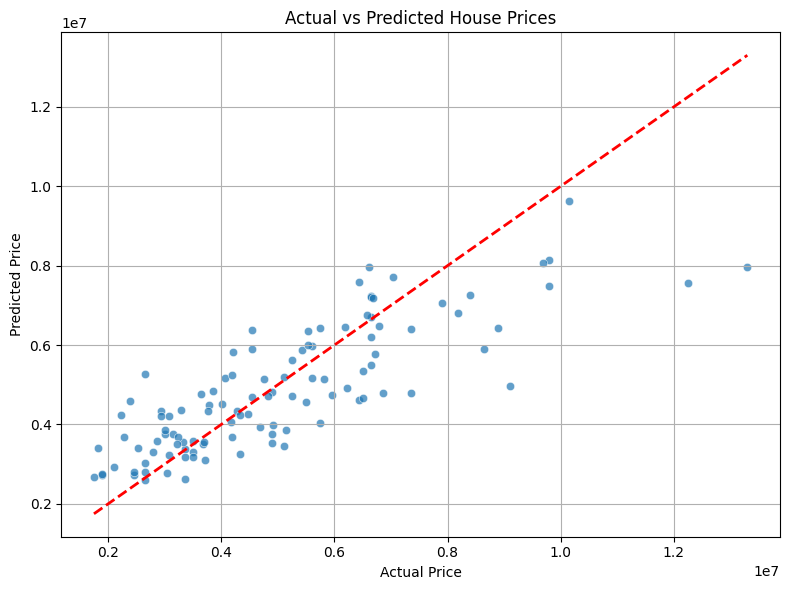

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()


##Coefficients Interpretation

In [17]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nTop Positive Coefficients:")
print(coefficients.head(10))

print("\nTop Negative Coefficients:")
print(coefficients.tail(10))



Top Positive Coefficients:
                Feature   Coefficient
2             bathrooms  1.094445e+06
9   airconditioning_yes  7.914267e+05
8   hotwaterheating_yes  6.846499e+05
10         prefarea_yes  6.298906e+05
3               stories  4.074766e+05
7          basement_yes  3.902512e+05
5          mainroad_yes  3.679199e+05
6         guestroom_yes  2.316100e+05
4               parking  2.248419e+05
1              bedrooms  7.677870e+04

Top Negative Coefficients:
                            Feature    Coefficient
10                     prefarea_yes  629890.565313
3                           stories  407476.594985
7                      basement_yes  390251.176181
5                      mainroad_yes  367919.947680
6                     guestroom_yes  231610.037176
4                           parking  224841.913277
1                          bedrooms   76778.701634
0                              area     235.968805
11  furnishingstatus_semi-furnished -126881.817585
12     furnishin